In [7]:
# Import Libraries
import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from src.data_processing import load_data, check_duplicates, analyze_missing_values, clean_dataset

url = "https://raw.githubusercontent.com/AndreCanto00/ML_project/main/tyres_train.csv"
data = load_data(url)

# Check for duplicates
duplicates = check_duplicates(data)
print("Number of duplicated rows:", len(duplicates))

# Analyze missing values
has_missing, missing_count = analyze_missing_values(data)
print("\nMissing values per column:")
print(missing_count)

# We decide to drop the column due to the large
# amount of missing values
#(approximately 70% of the values of the column).
# Alternatives such as replacement have been
# discarded since the number
#of missing values is very high.
# Now the dataset has 3000 rows and 15 columns

# Clean dataset
data_clean = clean_dataset(data)
print("\nShape after cleaning:", data_clean.shape)

Number of duplicated rows: 0

Missing values per column:
vulc                  0
perc_nat_rubber       0
wiring_strength       0
weather               0
perc_imp              0
temperature           0
tread_type            0
tyre_season           0
elevation             0
month                 0
tread_depth           0
tyre_quality          0
perc_exp_comp         0
diameter           2110
add_layers            0
failure               0
dtype: int64

Shape after cleaning: (3000, 15)


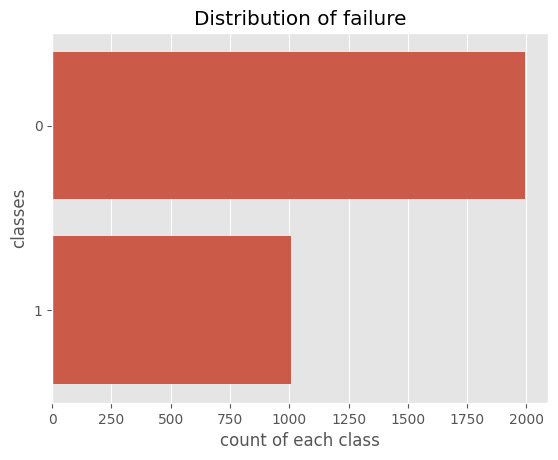

Target distribution:
failure
0    1992
1    1008
dtype: int64

Percentages:
failure
0    66.4
1    33.6
dtype: float64

Feature types:
vulc               float64
perc_nat_rubber      int64
wiring_strength      int64
weather            float64
perc_imp           float64
temperature        float64
tread_type           int64
tyre_season          int64
elevation          float64
month                int64
tread_depth          int64
tyre_quality         int64
perc_exp_comp      float64
add_layers           int64
failure              int64
dtype: object


In [9]:
from src.exploratory_analysis import analyze_target_distribution, analyze_feature_types

# The target variable is 'failure'.
# Here we check the number of 1 and 0 in the target
# column in order to see if the dataset is balanced
# The dataset is unbalanced beacuse 66.4% are
# ones and 33.6% are zeros

# Analyze target distribution
target_analysis = analyze_target_distribution(data_clean)
print("Target distribution:")
print(target_analysis['distribution'])
print("\nPercentages:")
print(target_analysis['percentages'])


# We check the type of the variables
# We don't need to perform any transformation
#like 'dummies' because the variables
# are either 'float64' or 'int64'.

# Analyze feature types
feature_types = analyze_feature_types(data_clean)
print("\nFeature types:")
print(feature_types)





In [10]:
from src.exploratory_analysis import split_features_by_type
# Split features
categorical_features, numerical_features = split_features_by_type(
    data_clean,
    categorical_exclude=['perc_nat_rubber'],
    numerical_exclude=['tread_type', 'tyre_season', 'month', 
                      'tread_depth', 'wiring_strength', 
                      'tyre_quality', 'add_layers']
)

print("\nCategorical features:")
print(categorical_features.head())
print("\nNumerical features:")
print(numerical_features.head())


Categorical features:
   wiring_strength  tread_type  tyre_season  month  tread_depth  tyre_quality  \
0                1           0            1      8            0             1   
1                1           2            0     11            1             0   
2                1           0            0      0            1             0   
3                1           1            0      7            3             1   
4                2           0            1      2            2             0   

   add_layers  
0           1  
1           1  
2           1  
3           1  
4           1  

Numerical features:
     vulc  perc_nat_rubber  weather  perc_imp  temperature  elevation  \
0  17.990               26     0.16      0.01        -8.12      332.5   
1  20.704               36     0.30      0.01        -4.52      328.0   
2  19.156               34     0.30      0.01        -1.08      247.0   
3  16.802               35     0.19      0.02         7.44      408.0   
4  17.14

### DATA VISUALIZATION


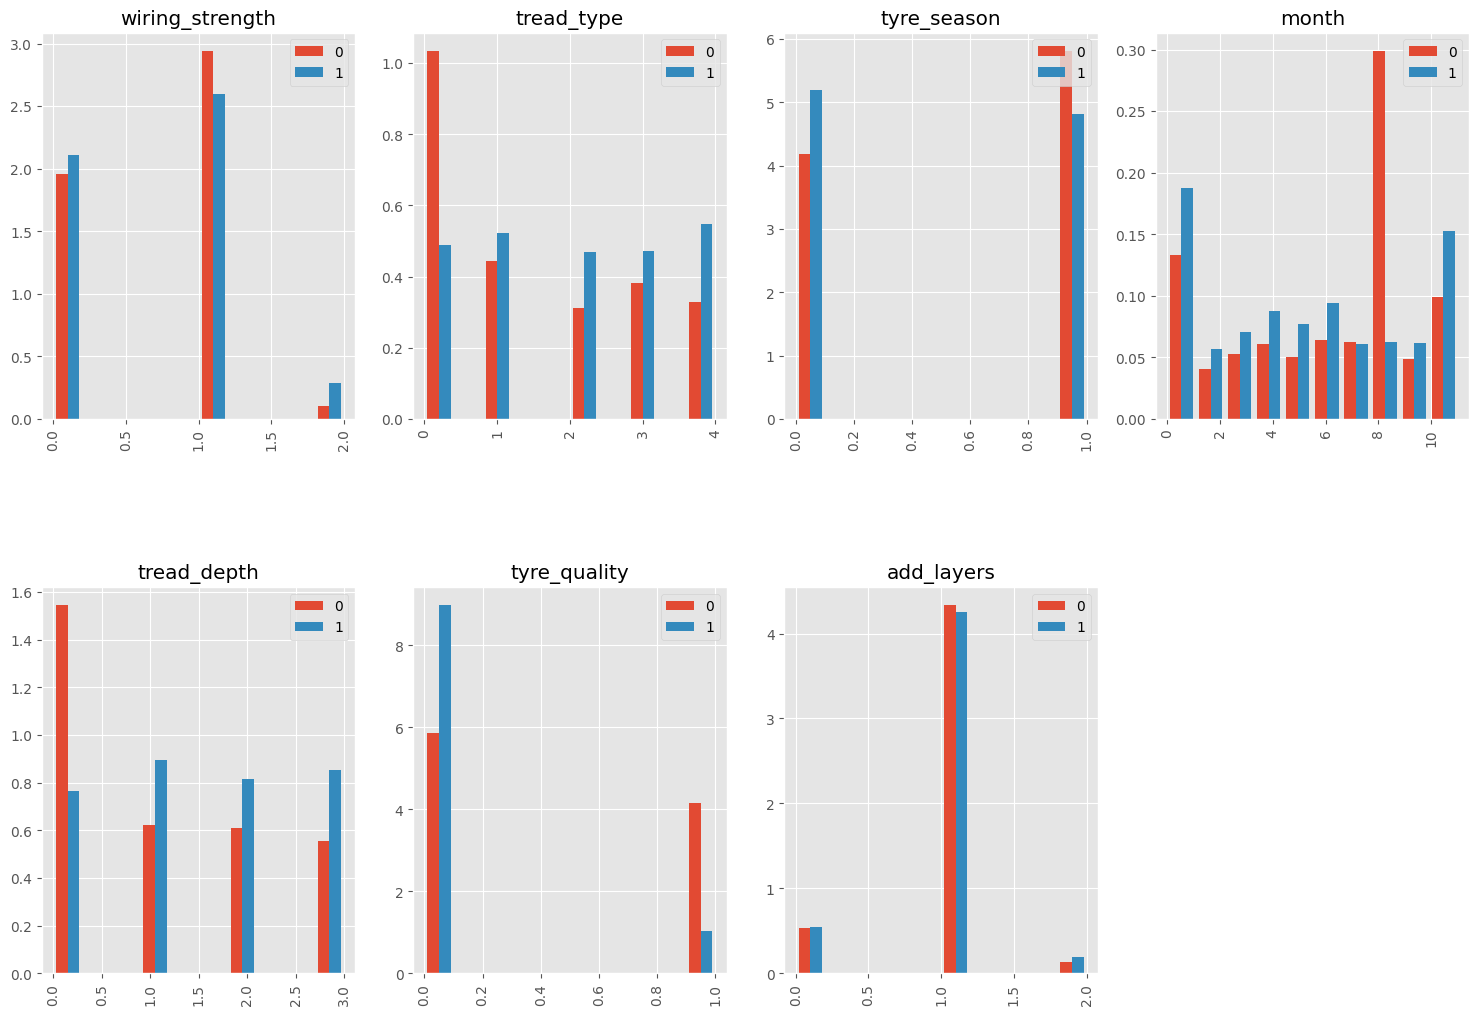

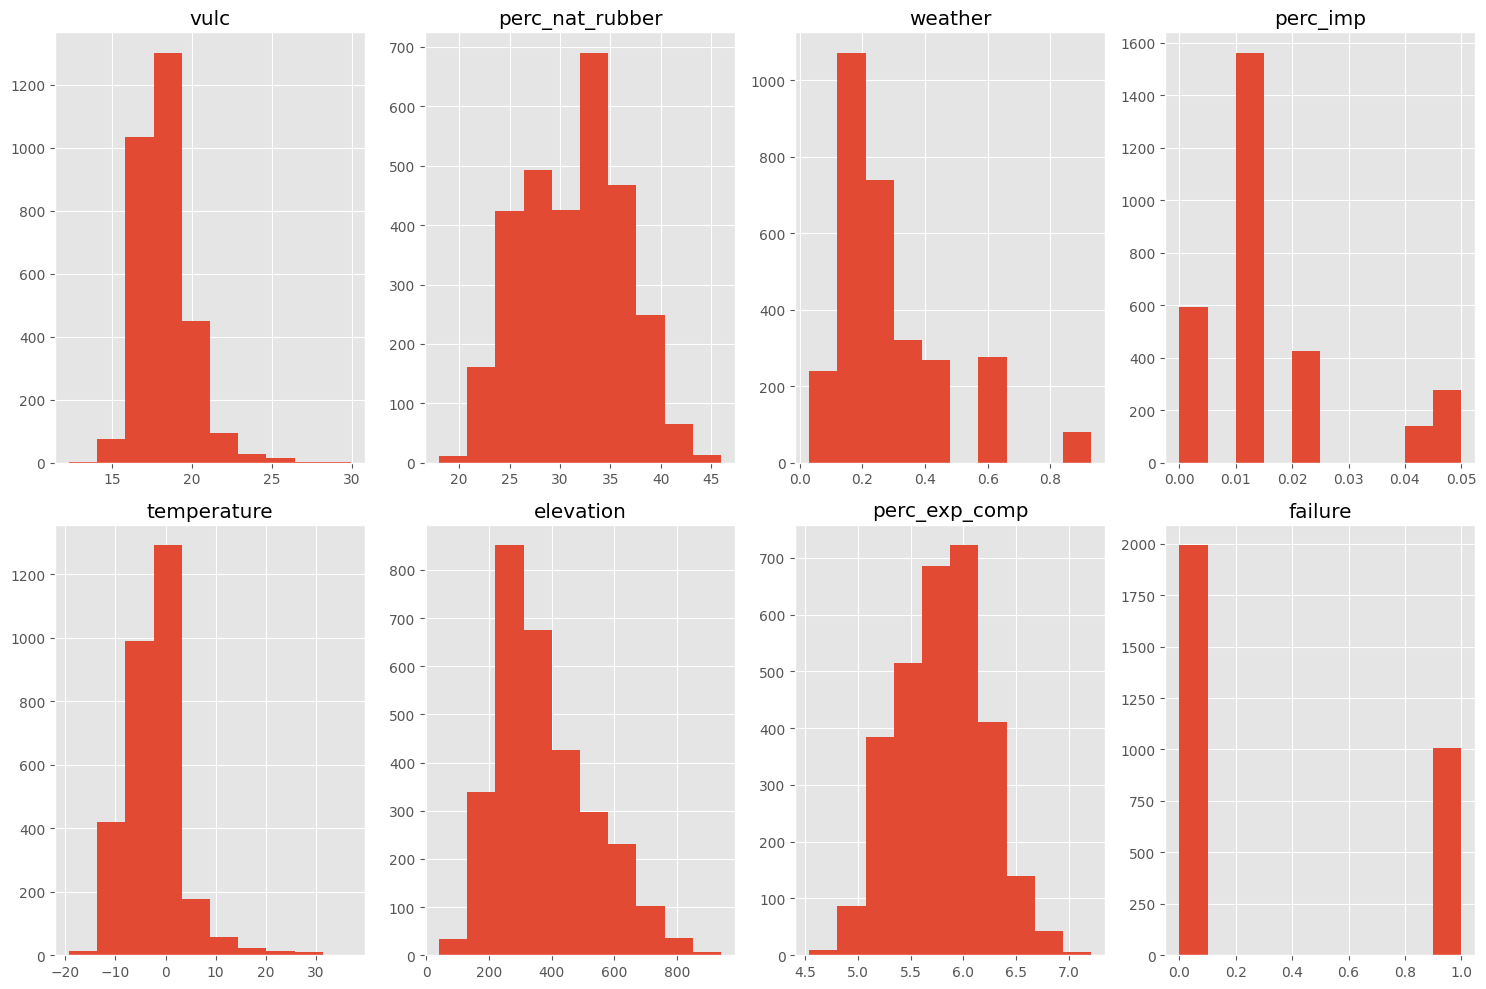

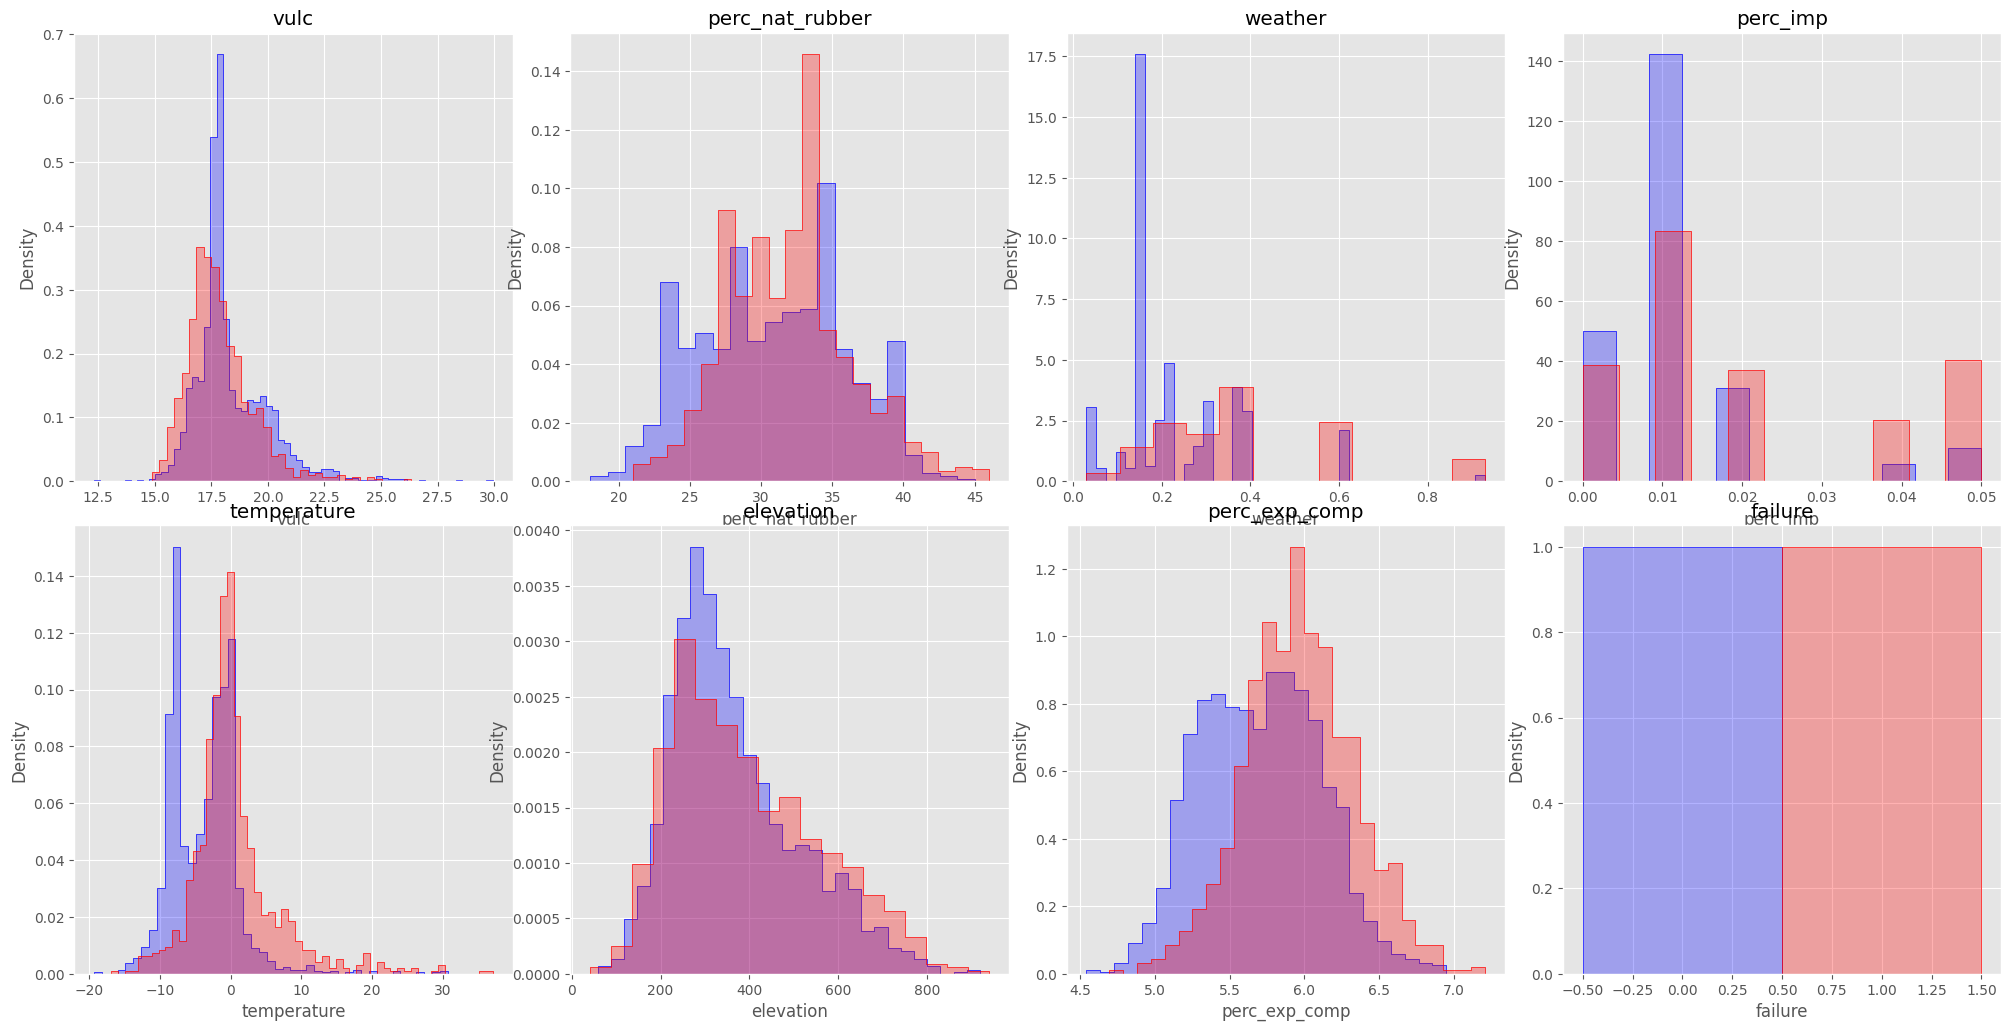

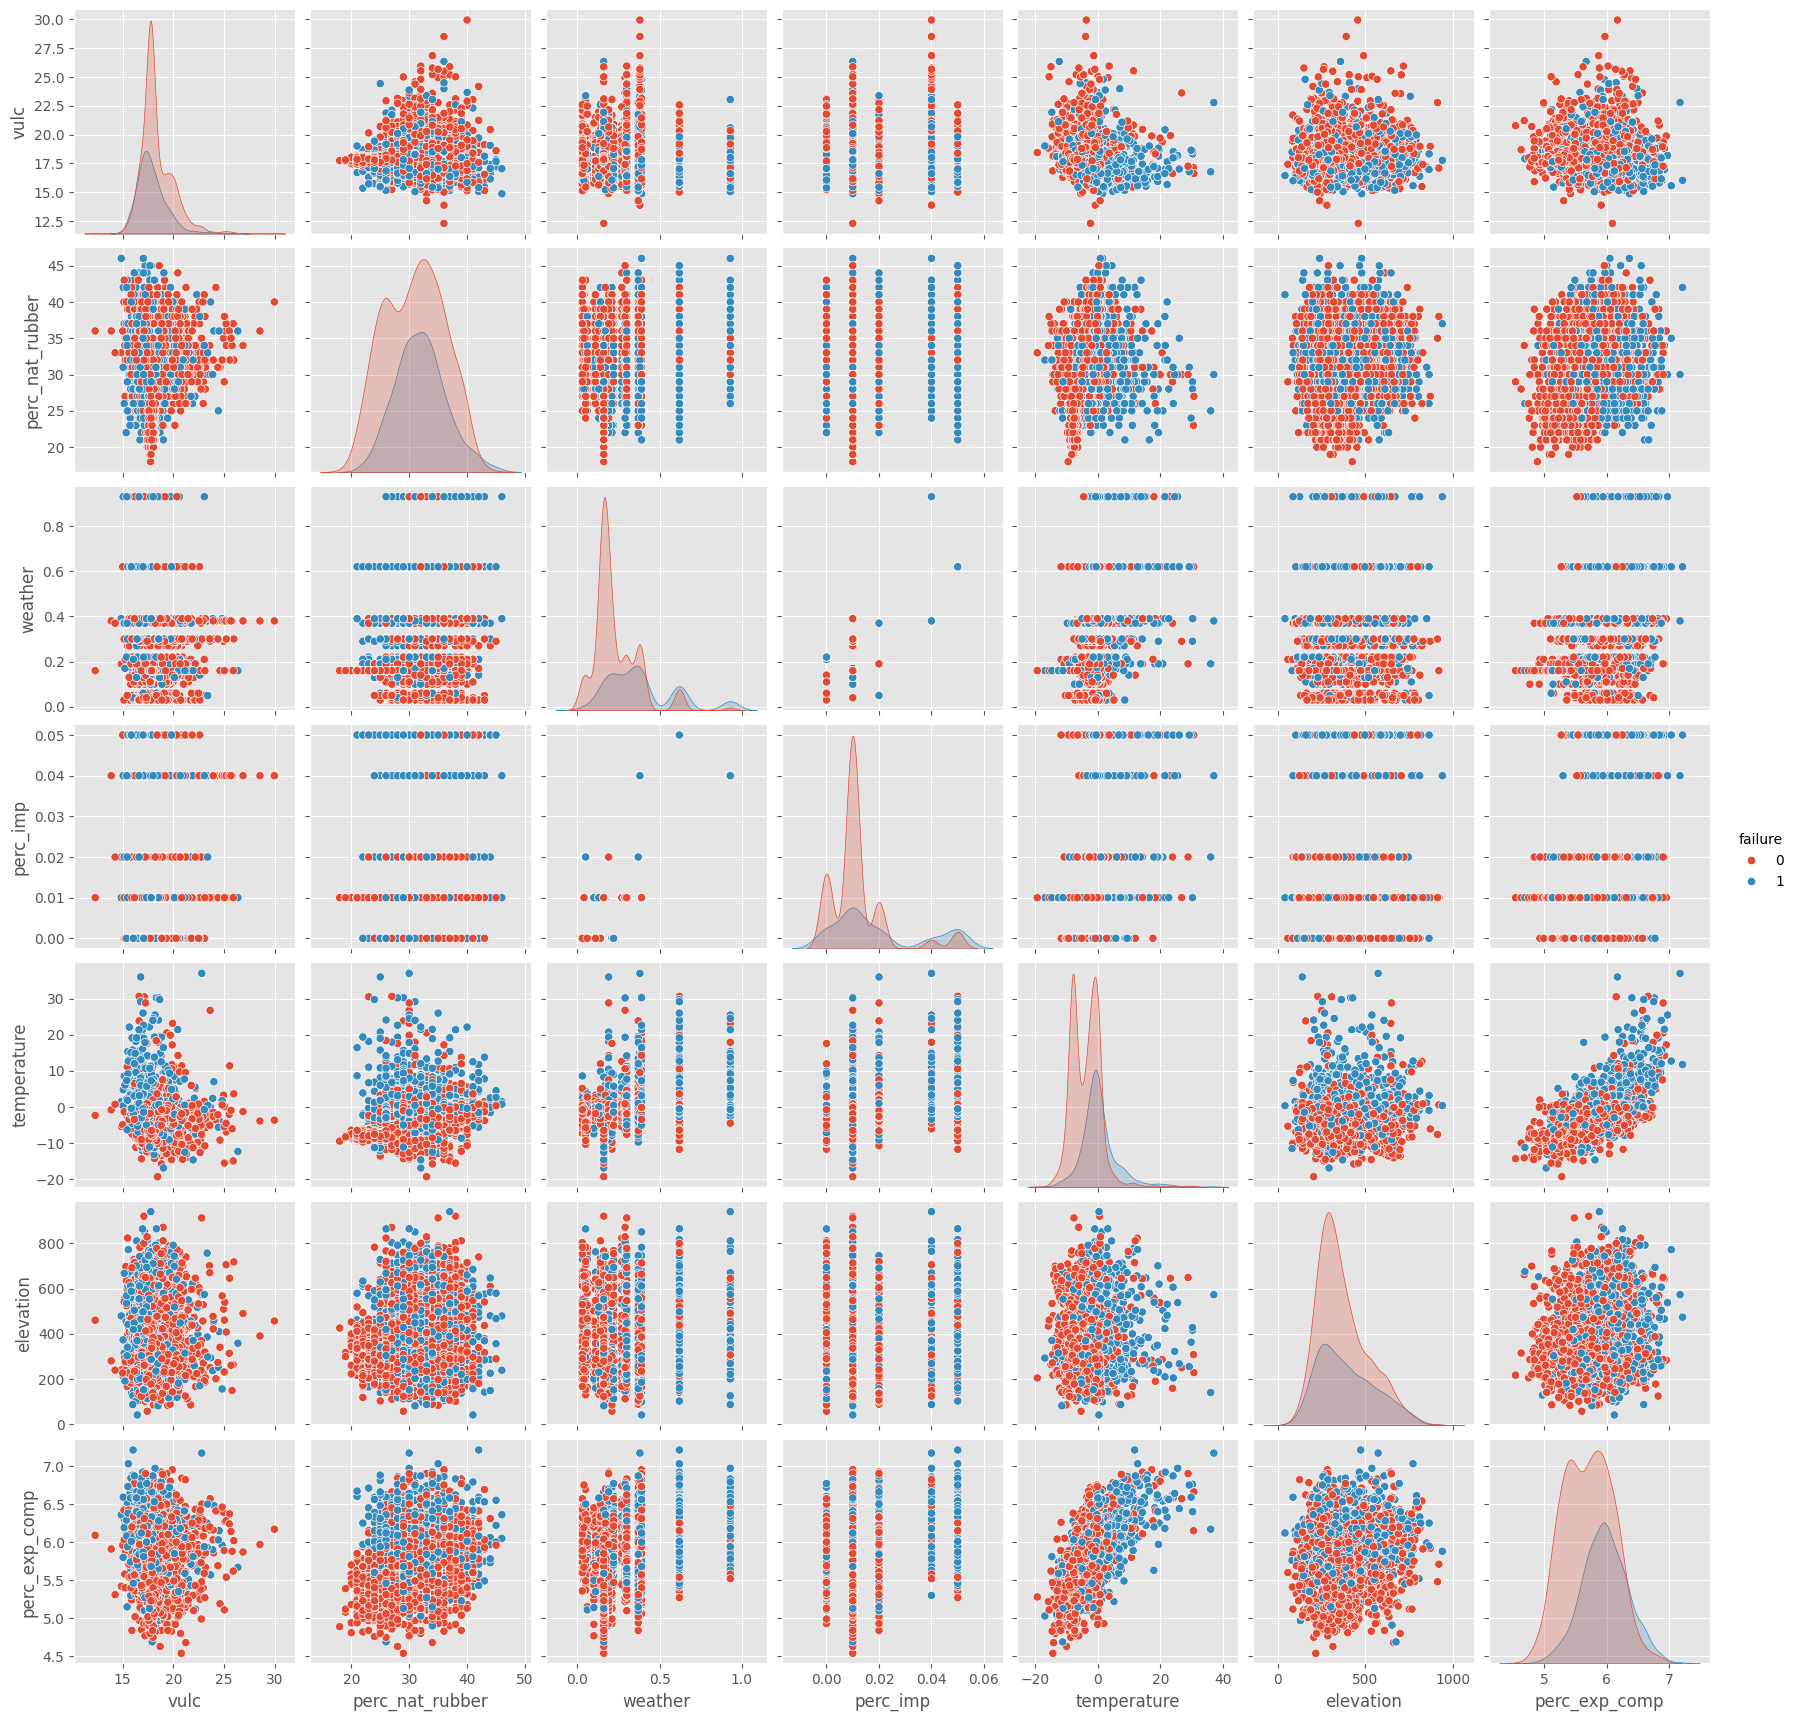

In [11]:
from src.visualization import (
    plot_categorical_by_target,
    plot_numerical_distributions,
    plot_numerical_by_target,
    plot_feature_relationships
)

# Plot categorical variables by target
categorical_cols = categorical_features.columns.tolist()
plot_categorical_by_target(data_clean, categorical_cols)

# Plot numerical distributions
numerical_cols = numerical_features.columns.tolist()
plot_numerical_distributions(numerical_features, numerical_cols)
# Here we analyze the distribution of the
# numerical variables
# None of the transormations tried (like log)
# have shown improvement in the results


# Plot numerical variables by target
plot_numerical_by_target(data_clean, numerical_cols)
# Divide numerical data depending on their
# value in 'failure'
# The results have been plotted with histograms
# This representation shows the attributes
#in which observations have been classified
# as 0 and 1 differ the most


# Plot relationships between features
plot_feature_relationships(numerical_features)
# This is a pairplot of the dataset where
#observations with different values have different colors
# No pattern seems to be particularly significant

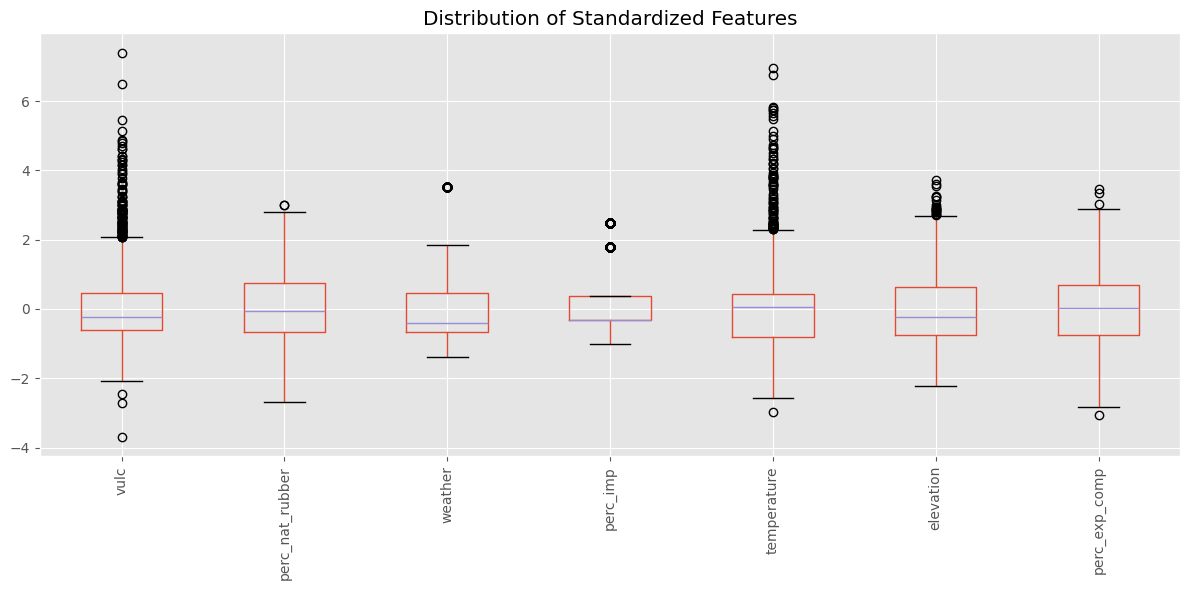

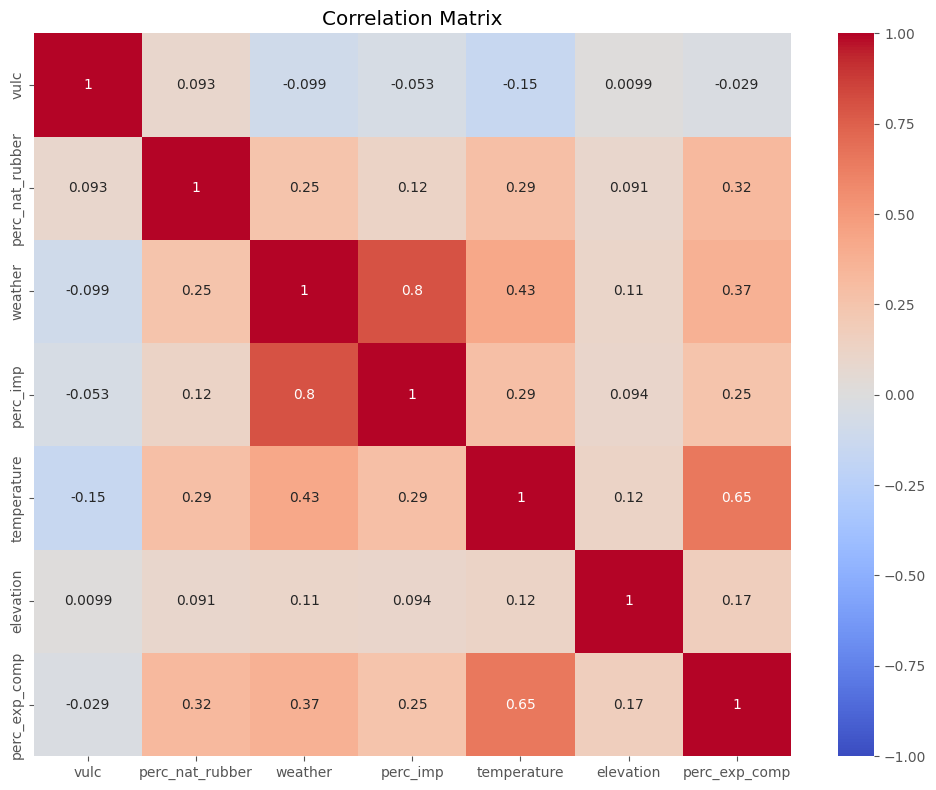

Final dataset shape: (3000, 15)

First few rows:
   wiring_strength  tread_type  tyre_season  month  tread_depth  tyre_quality  \
0                1           0            1      8            0             1   
1                1           2            0     11            1             0   
2                1           0            0      0            1             0   
3                1           1            0      7            3             1   
4                2           0            1      2            2             0   

   add_layers      vulc  perc_nat_rubber   weather  perc_imp  temperature  \
0           1 -0.122697        -1.064306 -0.671245 -0.319087    -1.012943   
1           1  1.587525         0.963073  0.092857 -0.319087    -0.378161   
2           1  0.612055         0.557597  0.092857 -0.319087     0.228409   
3           1 -0.871314         0.760335 -0.507509  0.382204     1.730726   
4           1 -0.658323        -1.672520  0.584065 -0.319087     5.800384   

 

In [ ]:
from src.data_preparation import (
    standardize_features,
    plot_scaled_distributions,
    compute_correlations,
    combine_features
)

# Standardize numerical features
# Before training the model the data needs
# to be standardized to ensure consistency
# the target column is not standardized
scaled_data, scaler = standardize_features(numerical_features, scaler_path='scaler.pkl')

# Visualize scaled distributions
plot_scaled_distributions(scaled_data)

# Compute and visualize correlations
correlation_matrix = compute_correlations(scaled_data)

# Combine all features
X = combine_features(
    categorical_data=categorical_features,
    numerical_data=scaled_data,
    target_data=data_clean["failure"]
)

print("Final dataset shape:", X.shape)
print("\nFirst few rows:")
print(X.head())

### SEPARATE TRAIN and TEST SETS

In [37]:
# The test set will contain 30% of the
# observations of the original set
# The proportion of the target variable
#is being preserved
# fix a random seed for replicability

from sklearn.model_selection import train_test_split
y = X['failure']
#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size =0.30,
                                                    stratify=y,
                                                    random_state= 321)

print(X_train.shape, X_test.shape)

(2100, 15) (900, 15)


In [38]:
# Also in the train set:
# 0: 66.4% of observations
# 1: 33.6% of observations
print(X_train.groupby("failure").size())

failure
0    1394
1     706
dtype: int64


In [39]:
# Here we resample the dataset and make it balanced
# We decided to use oversampling because it
# gives the best result among oversamplig,
# undersampling and SMOTE.
# Note that we resample only the train set in
# order to not make the results biased

# The resampling is being executed with
# replacement and the number of observations with
# 'failure' 1 will be equal to the number
# of the ones with 'failure' 0.

from sklearn.utils import resample

#Over-sample Minority Class
#1) Separate majority and minority classes
data_majority = X_train[X_train.failure==0] #"target" is the name of the target column, change it accordingly to your dataset
data_minority = X_train[X_train.failure==1] #"target" is the name of the target column, change it accordingly to your dataset

#2) Oversample minority class
data_minority_oversampled = resample(data_minority,
                                   replace=True,
                                   n_samples=1394,     # number of samples into the minority class
                                   random_state=123)  # reproducible results

#3) Combine oversampled minority class with majority class
data_oversampled = pd.concat([data_minority_oversampled, data_majority])

#4) Display new class counts
data_oversampled.failure.value_counts() #"target" is the name of the target column, change it accordingly to your dataset



,count
failure,
1,1394
0,1394


In [40]:
# Here we remove 'failure' column from resampled and
# non-resampled train sets and from the X_tes.
# To y_train_res has been assigned the
# corresponding oversampled target variable

X_train = X_train.drop(["failure"],axis=1)
X_train_res = data_oversampled.drop(["failure"],axis=1)
y_train_res = data_oversampled["failure"]
X_test = X_test.drop(["failure"],axis=1)

### TRAIN MODELS


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [42]:
from sklearn.model_selection import StratifiedKFold


In [43]:
# With this function we tunes the
# hyper-parameters of a model given in input
# The best F1 score obtained using the
# best parameters is printed.
# The model is then used to make predictions
# on the train set and on the test set.
# The value of precision, recall and F1
# is also printed with the confusion matrix.

cv = StratifiedKFold(5, shuffle=True, random_state=0) ## cv
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=cv, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_)) #

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("f1         train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) ))
    print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) ))
    print("recall    train  %.3f   test %.3f" % (recall_score(y_train, y_pred_train), recall_score(y_test, y_pred)))
    print("")
    print(confusion_matrix(y_test, y_pred))


In [44]:
# This function works in the same way as the one above.
# In this case we use the RESAMPLED train set

cv = StratifiedKFold(5, shuffle=True, random_state=0)
def hyperp_search_res(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=cv, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train_res, y_train_res)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_)) #

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train_res)

    print("f1         train %.3f   test %.3f" % (f1_score(y_train_res, y_pred_train), f1_score(y_test, y_pred) ))
    print("precision  train %.3f   test %.3f" % (precision_score(y_train_res, y_pred_train), precision_score(y_test, y_pred) ))
    print("recall    train  %.3f   test %.3f" % (recall_score(y_train_res, y_pred_train), recall_score(y_test, y_pred)))
    print("")
    print(confusion_matrix(y_test, y_pred))

In [45]:
# This function takes in input X_train_res,
#y_train_res, y_test and the model selected,
# then it shows the ROC curve obtained
#and prints the AUC

def roc(model,X_train_res,y_train_res,X_test,y_test):
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test)
    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)



KNN CLASSIFIER

In [46]:
# Results not great
# There is also overfitting,
#especially with resampling
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,60,1)}

print("\n NO RESAMPLING \n")
hyperp_search(classifier,parameters)
print("\n WITH RESAMPLING \n")
hyperp_search_res(classifier,parameters)


 NO RESAMPLING 

f1_train: 0.508967 using {'n_neighbors': 21}
f1         train 0.544   test 0.536
precision  train 0.689   test 0.656
recall    train  0.449   test 0.454

[[526  72]
 [165 137]]

 WITH RESAMPLING 

f1_train: 0.730127 using {'n_neighbors': 49}
f1         train 0.746   test 0.610
precision  train 0.691   test 0.500
recall    train  0.810   test 0.781

[[362 236]
 [ 66 236]]



 WITH RESAMPLING 



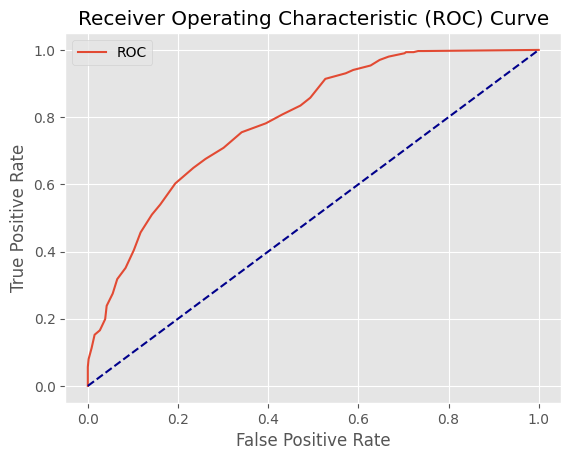

AUC: 0.79


In [47]:
model_knn = KNeighborsClassifier(n_neighbors = 49)
print("\n WITH RESAMPLING \n")
fpr1,tpr1=roc(model_knn,X_train_res,y_train_res,X_test,y_test)

TREE CLASSIFIER

In [48]:
# Results not great

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'],
              'max_depth': [10],
              'min_samples_split': [200],
              'min_samples_leaf': [20]}

print("\n NO RESAMPLING \n")
hyperp_search(classifier,parameters)
print("\n WITH RESAMPLING \n")
hyperp_search_res(classifier,parameters)


 NO RESAMPLING 

f1_train: 0.585547 using {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 200}
f1         train 0.630   test 0.616
precision  train 0.655   test 0.633
recall    train  0.606   test 0.599

[[493 105]
 [121 181]]

 WITH RESAMPLING 

f1_train: 0.719405 using {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 200}
f1         train 0.774   test 0.640
precision  train 0.736   test 0.537
recall    train  0.817   test 0.791

[[392 206]
 [ 63 239]]



 WITH RESAMPLING 



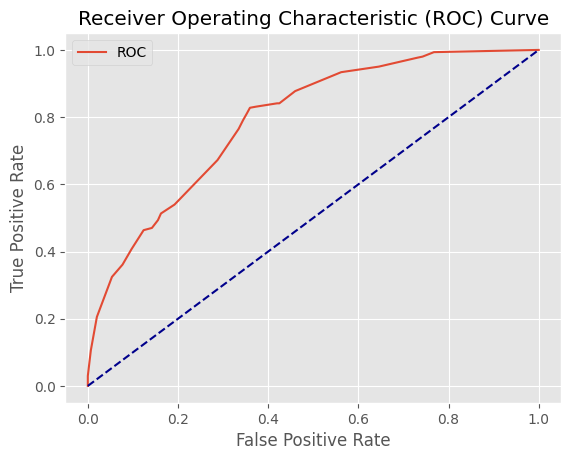

AUC: 0.79


In [49]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20, min_samples_split=200)
print("\n WITH RESAMPLING \n")
fpr2,tpr2=roc(model_tree,X_train_res,y_train_res,X_test,y_test)

NAIVE BAYES CLASSIFIER

In [50]:
# NO RESAMPLING

from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()

model_nb.fit(X_train, y_train)
y_pred=model_nb.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.5993690851735016
f1_test:  0.5993690851735016
[[456 142]
 [112 190]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       598
           1       0.57      0.63      0.60       302

    accuracy                           0.72       900
   macro avg       0.69      0.70      0.69       900
weighted avg       0.73      0.72      0.72       900



In [51]:
# WITH RESAMPLING

from sklearn.naive_bayes import GaussianNB

model_nb_res = GaussianNB()

model_nb_res.fit(X_train_res, y_train_res)
y_pred=model_nb_res.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.5991561181434599
f1_test:  0.5991561181434599
[[402 196]
 [ 89 213]]
              precision    recall  f1-score   support

           0       0.82      0.67      0.74       598
           1       0.52      0.71      0.60       302

    accuracy                           0.68       900
   macro avg       0.67      0.69      0.67       900
weighted avg       0.72      0.68      0.69       900




 WITH RESAMPLING 



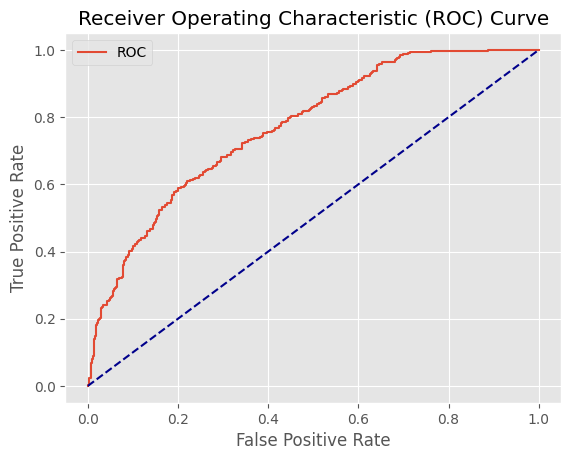

AUC: 0.77


In [52]:
y_probs = model_nb_res.predict_proba(X_test)
print("\n WITH RESAMPLING \n")
fpr3,tpr3=roc(model_nb_res,X_train_res,y_train_res,X_test,y_test)

LOGISTIC REGRESSION CLASSIFIER

In [53]:
# This classifier gives good results
#and it was one of the best we had

from sklearn.linear_model import LogisticRegression


classifier = LogisticRegression()
parameters = {"C":[0.3,0.2,1e-1,0.5,1,10], "max_iter":[1000] }


print("\n NO RESAMPLING \n")
hyperp_search(classifier,parameters)
print("\n WITH RESAMPLING \n")
hyperp_search_res(classifier,parameters)



 NO RESAMPLING 

f1_train: 0.537133 using {'C': 1, 'max_iter': 1000}
f1         train 0.557   test 0.605
precision  train 0.660   test 0.683
recall    train  0.482   test 0.543

[[522  76]
 [138 164]]

 WITH RESAMPLING 

f1_train: 0.723272 using {'C': 0.1, 'max_iter': 1000}
f1         train 0.730   test 0.651
precision  train 0.714   test 0.561
recall    train  0.747   test 0.775

[[415 183]
 [ 68 234]]



 WITH RESAMPLING 



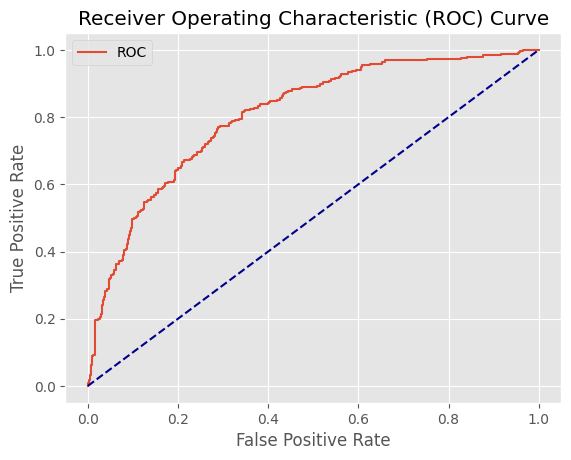

AUC: 0.81


In [54]:
model_logistic = LogisticRegression(C=0.1, max_iter=1000)
print("\n WITH RESAMPLING \n")
fpr4,tpr4=roc(model_logistic,X_train_res,y_train_res,X_test,y_test)

<ipython-input-55-156d5c30de94>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeff, y="feature", x="w", palette="Blues_d", orient="h")


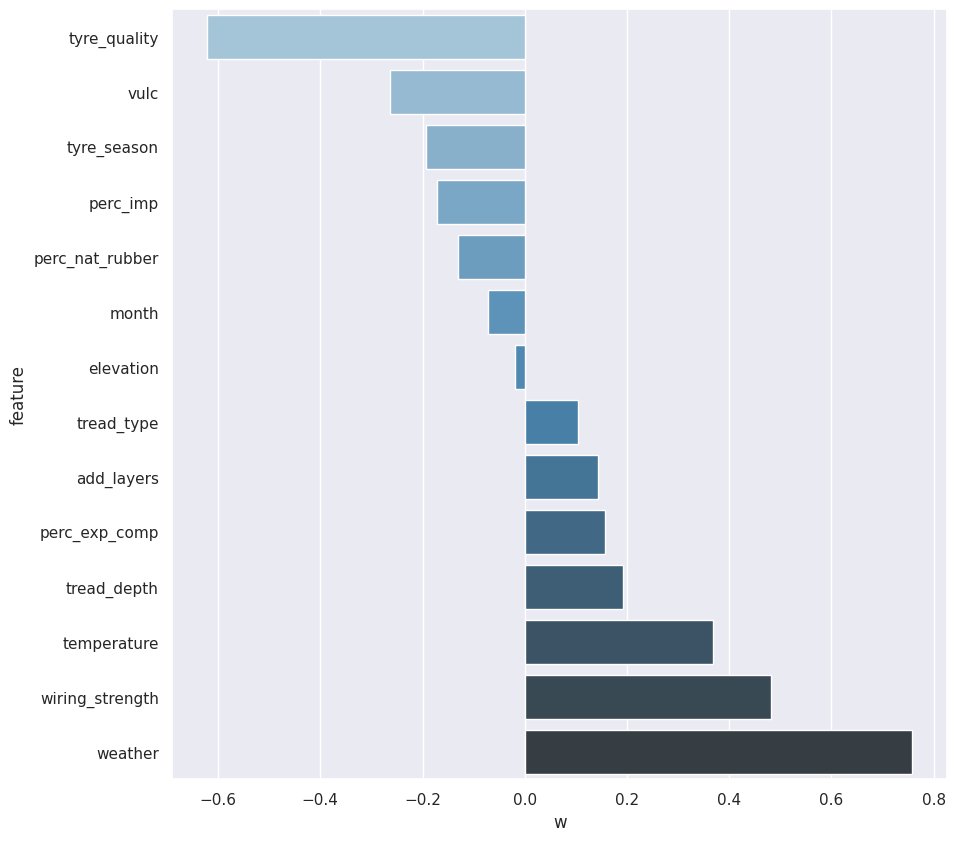

In [55]:
# Here we can see the effect of each variable

model_logistic.fit(X_train_res,y_train_res)

coeff=pd.DataFrame()
coeff["feature"]=X_train.columns
coeff["w"]=model_logistic.coef_[0]

coeff.sort_values(by=['w'], inplace=True)

sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=coeff, y="feature", x="w", palette="Blues_d", orient="h")
sns.set(rc={'figure.figsize':(6,4)})

SUPPORT VECTOR MACHINES

In [56]:
# This model gives the best results and
#it is the one we will use to make
# predictions because it has a good F1,
#precision and the best recall.
# The AUC is also good

# Here are reported only the results with
#the best parameters among different
#combinations that we have tried

from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[1500], "gamma":[1e-4]}

print("\n NO RESAMPLING \n")
hyperp_search(classifier,parameters)
print("\n WITH RESAMPLING \n")
hyperp_search_res(classifier,parameters)


 NO RESAMPLING 

f1_train: 0.527990 using {'C': 1500, 'gamma': 0.0001, 'kernel': 'linear'}
f1         train 0.542   test 0.584
precision  train 0.700   test 0.702
recall    train  0.442   test 0.500

[[534  64]
 [151 151]]

 WITH RESAMPLING 

f1_train: 0.733939 using {'C': 1500, 'gamma': 0.0001, 'kernel': 'rbf'}
f1         train 0.748   test 0.654
precision  train 0.712   test 0.550
recall    train  0.789   test 0.808

[[398 200]
 [ 58 244]]



 WITH RESAMPLING 



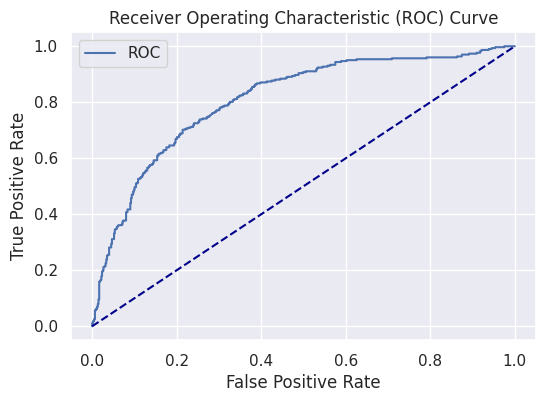

AUC: 0.81


In [57]:
model_svm = SVC(C=1500, kernel='rbf',probability=True, gamma= 1e-4)
print("\n WITH RESAMPLING \n")
fpr5,tpr5=roc(model_svm,X_train_res,y_train_res,X_test,y_test)

NEURAL NETWORKS

In [58]:
# The result is about one of the best
#disposition of nodes and layer
# that we obtained

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(3,3)],"activation":["logistic", "tanh", "relu"], "max_iter":[1000],
              "learning_rate":["constant", "adaptive"], "alpha": [0.001,0.01,0.1,0.05,0.2]}

print("\n NO RESAMPLING \n")
hyperp_search(classifier,parameters)
print("\n WITH RESAMPLING \n")
hyperp_search_res(classifier,parameters)


 NO RESAMPLING 

f1_train: 0.592168 using {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'max_iter': 1000}
f1         train 0.599   test 0.618
precision  train 0.659   test 0.653
recall    train  0.548   test 0.586

[[504  94]
 [125 177]]

 WITH RESAMPLING 

f1_train: 0.738279 using {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'max_iter': 1000}
f1         train 0.756   test 0.650
precision  train 0.720   test 0.548
recall    train  0.795   test 0.798

[[399 199]
 [ 61 241]]



 WITH RESAMPLING 



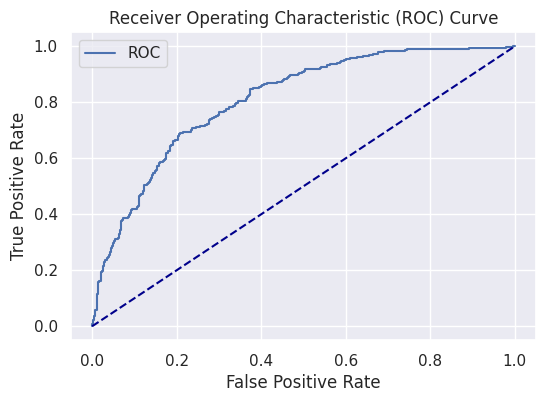

AUC: 0.81


In [59]:
model_MLP=MLPClassifier(hidden_layer_sizes=(3,3), alpha=0.01,
                        max_iter=1000, activation='logistic', learning_rate='adaptive')
print("\n WITH RESAMPLING \n")
fpr6,tpr6=roc(model_MLP,X_train_res,y_train_res,X_test,y_test)

RANDOM FOREST

In [60]:
# The results are decent but we discarded
#it due to overfitting

from sklearn.ensemble import RandomForestClassifier

classifier= RandomForestClassifier()
parameters = {'n_estimators' : [25, 30, 50, 75, 100],
    'criterion' : ['entropy', 'gini'],
             'max_depth' : [1,2,3,4],
             'min_samples_split' : [100],
              'min_samples_leaf' : [50]
             }

print("\n NO RESAMPLING \n")
hyperp_search(classifier,parameters)
print("\n WITH RESAMPLING \n")
hyperp_search_res(classifier,parameters)


 NO RESAMPLING 

f1_train: 0.502270 using {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}
f1         train 0.523   test 0.520
precision  train 0.729   test 0.731
recall    train  0.408   test 0.404

[[553  45]
 [180 122]]

 WITH RESAMPLING 

f1_train: 0.749987 using {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}
f1         train 0.762   test 0.634
precision  train 0.691   test 0.512
recall    train  0.849   test 0.831

[[359 239]
 [ 51 251]]



 WITH RESAMPLING 



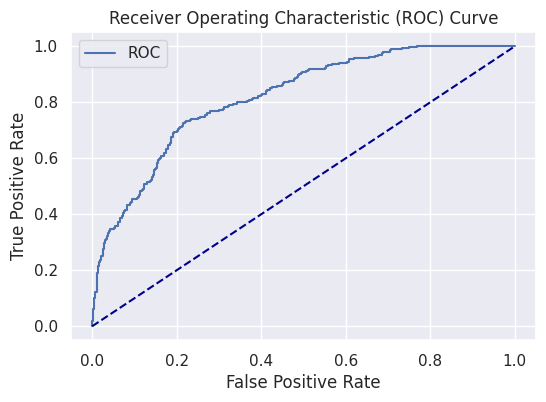

AUC: 0.82


In [61]:
model_rf=RandomForestClassifier(criterion ='gini', max_depth= 4,
                                min_samples_leaf= 50, min_samples_split= 100, n_estimators= 50 )
print("\n WITH RESAMPLING \n")
fpr7,tpr7=roc(model_rf,X_train_res,y_train_res,X_test,y_test)

ADABOOST

In [64]:
# We decided to discard this model because of the F1

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

classifier= AdaBoostClassifier()
parameters = {'n_estimators' : [1, 5],
    'learning_rate' : [0.0001, 0.01, 0.1, 1, 10], 'estimator':[DecisionTreeClassifier(max_depth=3)]}

print("\n NO RESAMPLING \n")
hyperp_search(classifier,parameters)
print("\n WITH RESAMPLING \n")
hyperp_search_res(classifier,parameters)



 NO RESAMPLING 

f1_train: 0.575894 using {'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 1, 'n_estimators': 5}
f1         train 0.634   test 0.636
precision  train 0.622   test 0.617
recall    train  0.646   test 0.656

[[475 123]
 [104 198]]

 WITH RESAMPLING 

f1_train: 0.716121 using {'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.1, 'n_estimators': 5}
f1         train 0.758   test 0.619
precision  train 0.657   test 0.478
recall    train  0.895   test 0.877

[[309 289]
 [ 37 265]]



 WITH RESAMPLING 



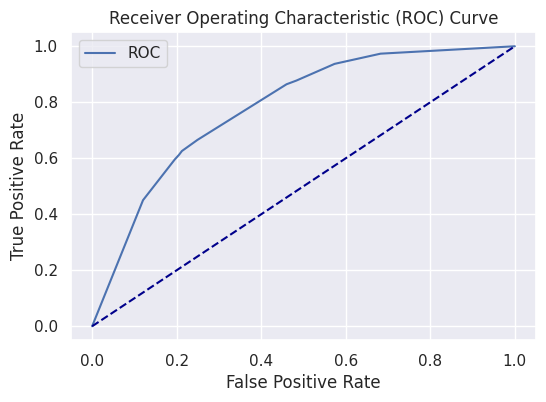

AUC: 0.78


In [66]:
model_ab=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth= 3), learning_rate= 0.1, n_estimators= 5)
print("\n WITH RESAMPLING \n")
fpr8,tpr8=roc(model_ab,X_train_res,y_train_res,X_test,y_test)

###**SAVE THE MODEL AND MAKE PREDICTIONS ON NEW DATA**



In [67]:
# On one hand resampling has improved the
#quality of our models.
#On the other hand it increases also the overfitting
# We choose to use Sample vector machines trained
#with resampled train set
# C = 1500, gamma = 0.0001, kernel = rbf

# Here we save the model and choose to make predictions with pickle
pickle.dump(model_svm, open('svm_model.pkl', 'wb'))

In [68]:
# Load the model and the scaler saved before
loaded_scaler = pickle.load(open('scaler.pkl', 'rb'))
loaded_model = pickle.load(open('svm_model.pkl', 'rb'))

In [69]:
# Read the new dataset
url = "https://raw.githubusercontent.com/AndreCanto00/ML_project/main/tyres_train.csv"
df = pd.read_csv(url)

In [70]:
# The new dataset must be processed in the same
#way as the dataset used to train the model,


df=df.drop(["diameter"], axis=1)

# Categorical
df_cat = df[["wiring_strength","tread_type","tyre_season","month","tread_depth","tyre_quality","add_layers"]]

# Numerical
df_num = df[["vulc","perc_nat_rubber","weather","perc_imp","temperature","elevation","perc_exp_comp"]]
# Scaling

scaled_df_num = pd.DataFrame(loaded_scaler.transform(df_num))
scaled_df_num.columns = df_num.columns

# Recreating the dataset

X2=pd.concat([df_cat,scaled_df_num], axis = 1)

In [71]:
X2

,wiring_strength,tread_type,tyre_season,month,tread_depth,tyre_quality,add_layers,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp
0,1,0,1,8,0,1,1,-0.122697,-1.064306,-0.671245,-0.319087,-1.012943,-0.289059,-1.612448
1,1,2,0,11,1,0,1,1.587525,0.963073,0.092857,-0.319087,-0.378161,-0.318836,0.873829
2,1,0,0,0,1,0,1,0.612055,0.557597,0.092857,-0.319087,0.228409,-0.854817,1.385710
3,1,1,0,7,3,1,1,-0.871314,0.760335,-0.507509,0.382204,1.730726,0.210528,2.019467
4,2,0,1,2,2,0,1,-0.658323,-1.672520,0.584065,-0.319087,5.800384,-0.451177,0.873829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2,1,1,10,1,1,1,-0.231083,-0.456093,0.584065,-0.319087,1.702514,-0.586827,-0.271809
2996,1,1,1,6,1,0,1,-0.698653,-0.253355,-0.343773,-1.020379,0.164930,-1.480129,0.045070
2997,1,1,0,8,3,1,0,-1.269567,0.354859,0.584065,-0.319087,-0.187726,-0.934222,-0.539937
2998,0,4,0,11,0,0,0,0.433093,1.165810,-1.380768,-1.020379,0.284834,-0.570284,0.240072


In [72]:
# Use the model to make predictions on the new dataset
y_svm_predictions = loaded_model.predict(X2)

In [73]:
# Check dimensions of the vector

y_svm_predictions.shape

(3000,)

In [74]:
# Export predictions on a txt file
from numpy import savetxt

np.savetxt('y_svm_predictions.txt', y_svm_predictions, fmt='%.0f')